<a href="https://colab.research.google.com/github/anilbhatt1/CNN-EIP4-S4/blob/anilbhatt1-patch-1/EIP4_S4_Assignment_4B_Gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
import os
from skimage import io
from keras import backend as K
import pandas as pd

Using TensorFlow backend.


In [0]:
def grad_cam(input_img):
  
  model = VGG16(weights="imagenet")
  from skimage import io
  pic = io.imread(input_img)
  pic = cv2.resize(pic, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(pic)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("block5_conv3")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (pic.shape[1], pic.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(pic, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  cv2_imshow( pic)
  cv2_imshow(superimposed_img)

In [3]:
# This will upload the zip file to colab. A prompt will appear to choose files
from google.colab import files
uploaded = files.upload()

Saving Dog_Cat.zip to Dog_Cat.zip


In [0]:
# We are extracting the 'Dog_Cat.zip' to img_extract
import zipfile
import io
img_extract = zipfile.ZipFile(io.BytesIO(uploaded['Dog_Cat.zip']), 'r')
img_extract.extractall()

In [5]:
#Listing down the directory and contents of img_extract
img_extract.printdir()

File Name                                             Modified             Size
Dog_Cat/cat.11.jpg                             2013-09-20 13:06:22        22295
Dog_Cat/cat.15.jpg                             2013-09-20 13:07:26        20569
Dog_Cat/cat.26.jpg                             2013-09-20 13:08:04        20535
Dog_Cat/cat.6.jpg                              2013-09-20 13:10:00        21413
Dog_Cat/cat.60.jpg                             2013-09-20 13:10:00         7141
Dog_Cat/dog.17.jpg                             2013-09-20 13:00:38        15818
Dog_Cat/dog.172.jpg                            2013-09-20 13:00:40        32057
Dog_Cat/dog.329.jpg                            2013-09-20 13:01:36        11440
Dog_Cat/dog.458.jpg                            2013-09-20 13:02:20        37554
Dog_Cat/dog.77.jpg                             2013-09-20 13:04:10        17406


Dog_Cat/dog.77.jpg
259
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


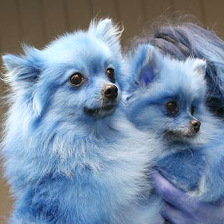

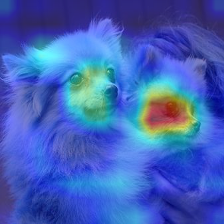

Dog_Cat/dog.329.jpg
208
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


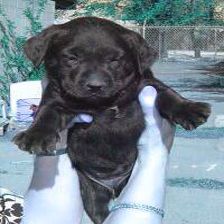

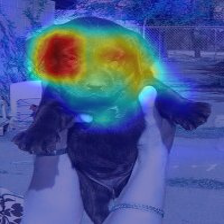

Dog_Cat/cat.26.jpg
552
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


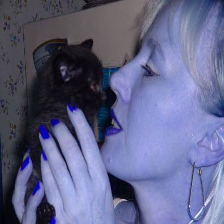

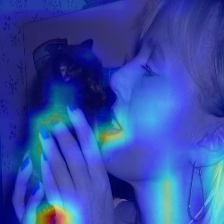

Dog_Cat/dog.17.jpg
206
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


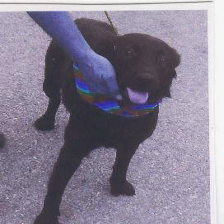

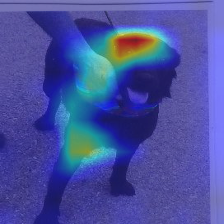

Dog_Cat/cat.60.jpg
760
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


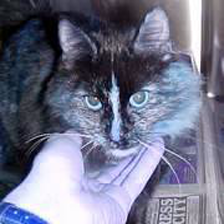

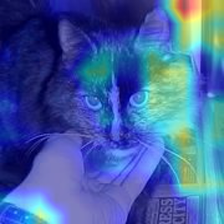

Dog_Cat/cat.11.jpg
285
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


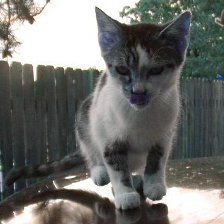

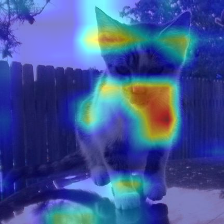

Dog_Cat/cat.6.jpg
223
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


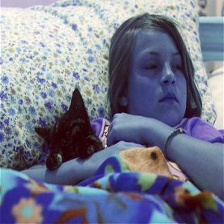

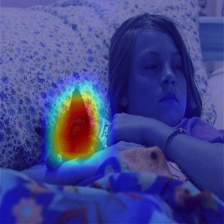

Dog_Cat/dog.172.jpg
250
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


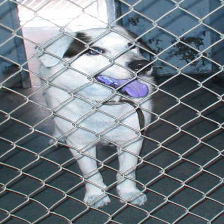

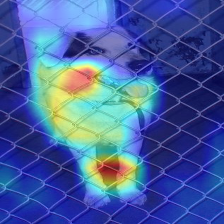

Dog_Cat/dog.458.jpg
269
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


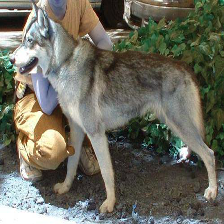

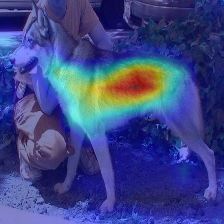

Dog_Cat/cat.15.jpg
378
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


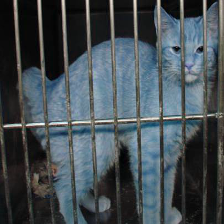

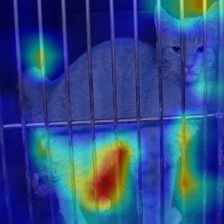

In [8]:
for img in os.listdir('Dog_Cat/'):  
    img_name = os.path.join('Dog_Cat/',img)  # convert to array
    print(img_name)
    grad_cam(img_name)